In [266]:
!pip install pivotpal

**Importing Libraries and Loading Data**

*This section includes the necessary library imports and loading the dataset for analysis.*


In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pivotpal as pp
import numpy as np

In [268]:
df = pd.read_csv('/content/winequality-white.csv', delimiter=';')

In [269]:
df.groupby(['quality'])[['alcohol']].describe()# describes data in groups.

alcohol                                                      
          count       mean       std   min    25%    50%    75%   max
quality                                                              
3          20.0  10.345000  1.224089   8.0   9.55  10.45  11.00  12.6
4         163.0  10.152454  1.003217   8.4   9.40  10.10  10.75  13.5
5        1457.0   9.808840  0.847065   8.0   9.20   9.50  10.30  13.6
6        2198.0  10.575372  1.147776   8.5   9.60  10.50  11.40  14.0
7         880.0  11.367936  1.246536   8.6  10.60  11.40  12.30  14.2
8         175.0  11.636000  1.280138   8.5  11.00  12.00  12.60  14.0
9           5.0  12.180000  1.013410  10.4  12.40  12.50  12.70  12.9

# **Visualizing Fixed Acidity**

*Visualize different aspects of 'fixed acidity' using a 2x2 grid of subplots, including histograms, boxplots, and violin plots.*


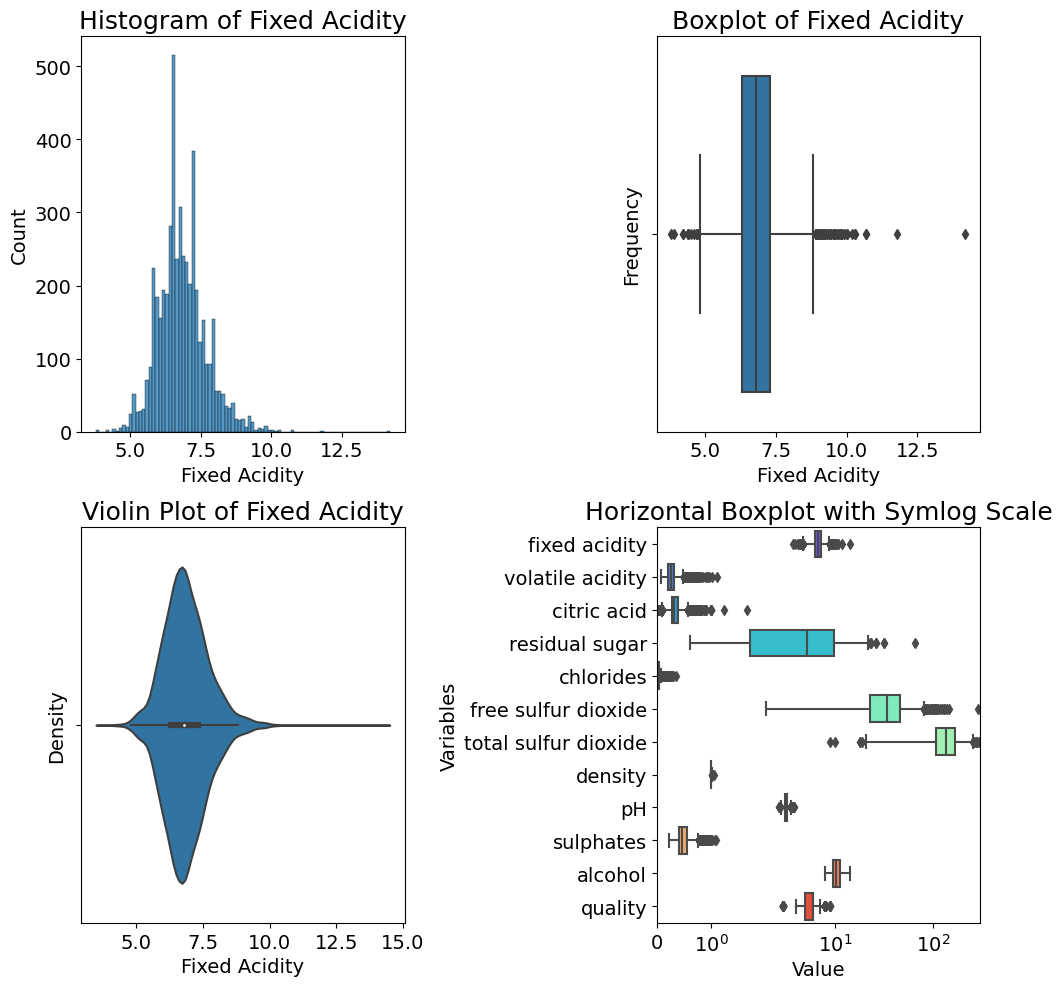

In [270]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# First plot: Histogram
sns.histplot(x="fixed acidity", data=df, ax=axs[0, 0])
axs[0, 0].set_title("Histogram of Fixed Acidity", fontsize=18)
axs[0, 0].set_xlabel("Fixed Acidity", fontsize=14)
axs[0, 0].set_ylabel("Count", fontsize=14)
axs[0, 0].tick_params(labelsize=14)

# Second plot: Boxplot
sns.boxplot(x='fixed acidity', data=df, ax=axs[0, 1])
axs[0, 1].set_title("Boxplot of Fixed Acidity", fontsize=18)
axs[0, 1].set_xlabel("Fixed Acidity", fontsize=14)
axs[0, 1].set_ylabel("Frequency", fontsize=14)
axs[0, 1].tick_params(labelsize=14)

# Third plot: Violin plot
sns.violinplot(x='fixed acidity', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Violin Plot of Fixed Acidity", fontsize=18)
axs[1, 0].set_xlabel("Fixed Acidity", fontsize=14)
axs[1, 0].set_ylabel("Density", fontsize=14)
axs[1, 0].tick_params(labelsize=14)

# Fourth plot: Horizontal boxplot with symlog scale
sns.boxplot(data=df, orient="h", palette="rainbow", ax=axs[1, 1])
axs[1, 1].set_xscale('symlog')
axs[1, 1].axis(xmin=0, xmax=300)
axs[1, 1].set_title("Horizontal Boxplot with Symlog Scale", fontsize=18)
axs[1, 1].set_xlabel("Value", fontsize=14)
axs[1, 1].set_ylabel("Variables", fontsize=14)
axs[1, 1].tick_params(labelsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


## **Correlation Matrix**

*Calculate and display the correlation matrix of the dataset to understand the relationships between different variables.*


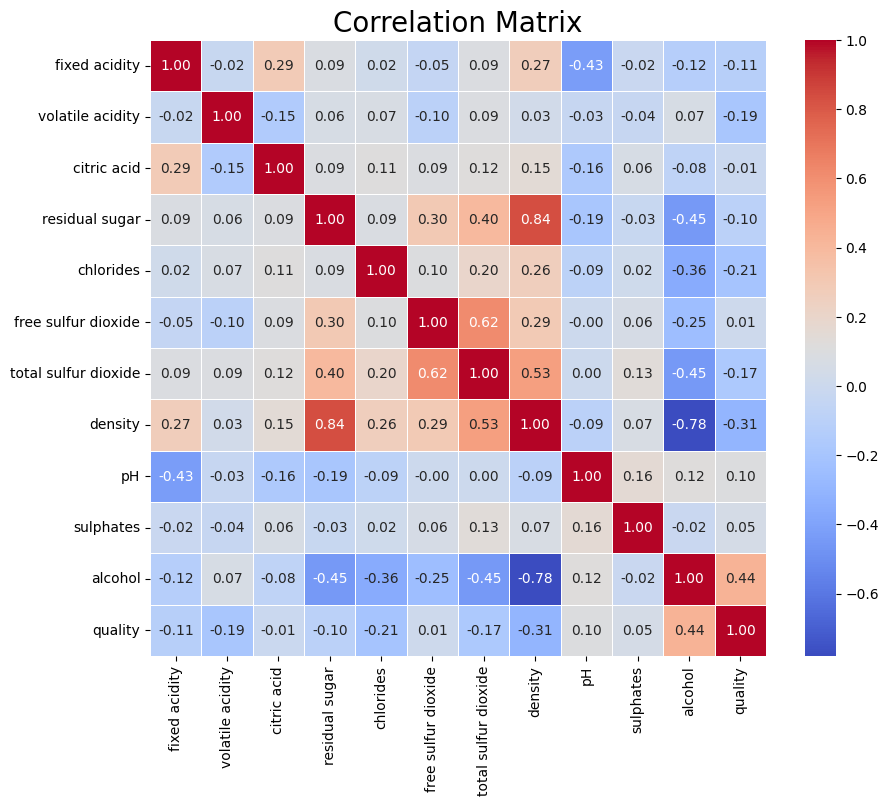

In [271]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

# Add title and labels (optional, for better readability)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

In [272]:
pp.distribution(df, 'quality')

,quality,count,%
0,6,2198,44.88
1,5,1457,29.75
2,7,880,17.97
3,8,175,3.57
4,4,163,3.33
5,3,20,0.41
6,9,5,0.10


## **Scatter Plots: Variables vs Quality**

*Generate scatter plots for each variable in the dataset against the wine quality to observe their individual relationships.*


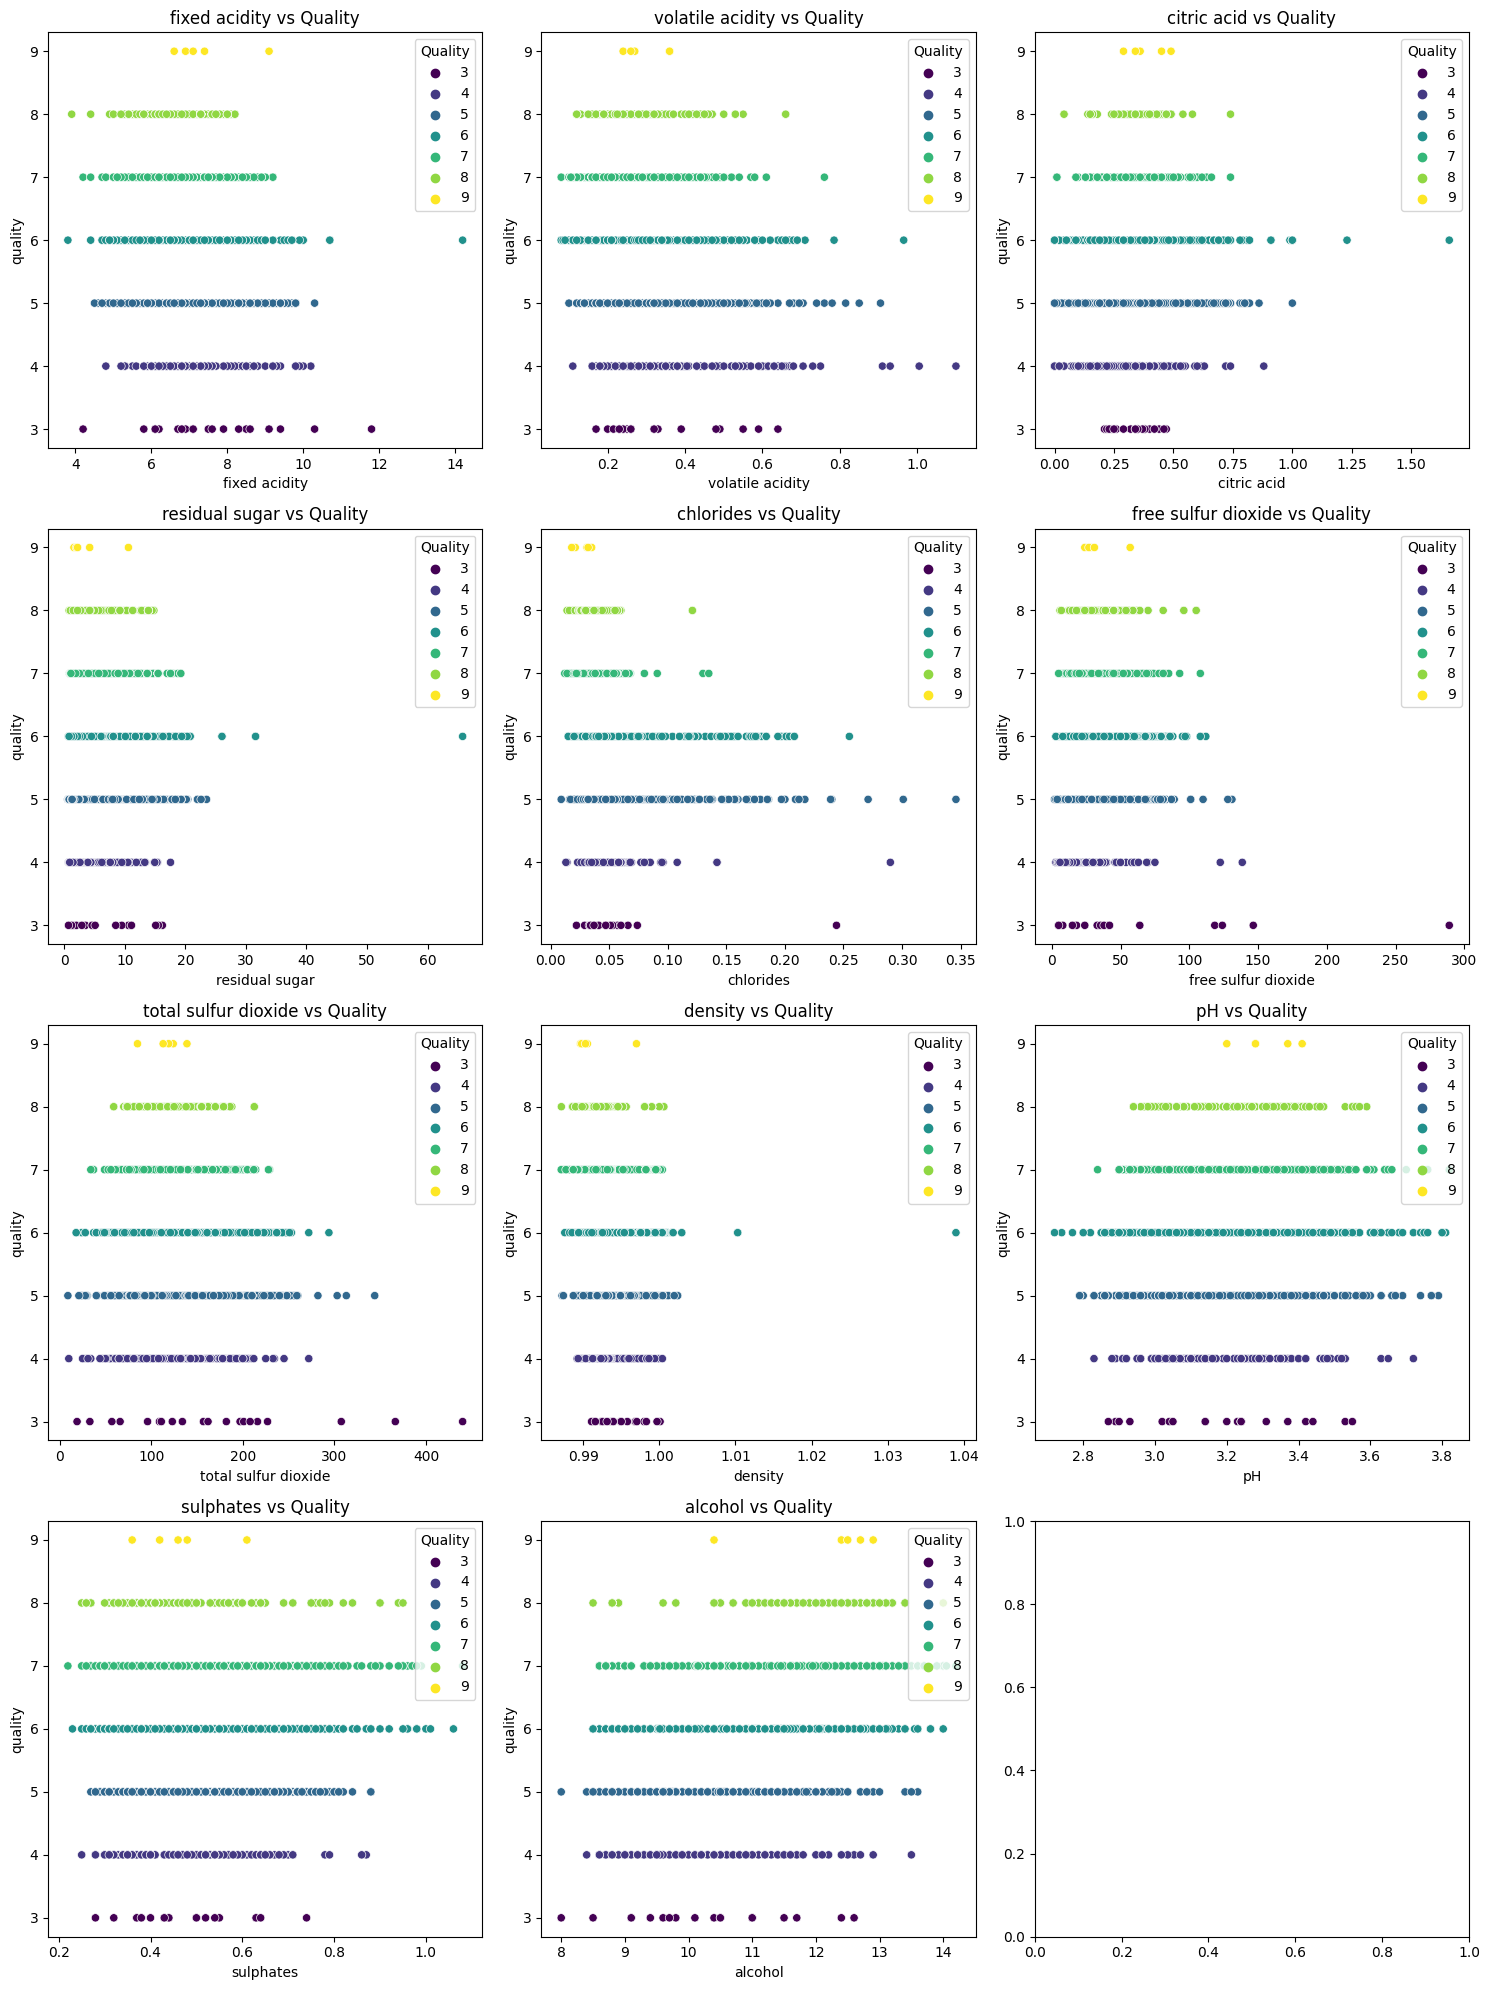

In [273]:
# List of variables to plot against 'quality'
variables = df.columns.drop('quality')

# Create a figure with subplots
n_vars = len(variables)
n_cols = 3  # Number of columns in the subplot grid
n_rows = n_vars // n_cols + (n_vars % n_cols > 0)  # Calculate the required number of rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

for i, var in enumerate(variables):
    row = i // n_cols
    col = i % n_cols
    sns.scatterplot(x=var, y='quality', data=df, ax=axs[row, col], palette='viridis', hue='quality')
    axs[row, col].set_title(f'{var} vs Quality')
    axs[row, col].legend(title='Quality', loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## **Box Plots by Quality**

*Create box plots for each variable segmented by wine quality to observe the distribution and outliers in each category.*


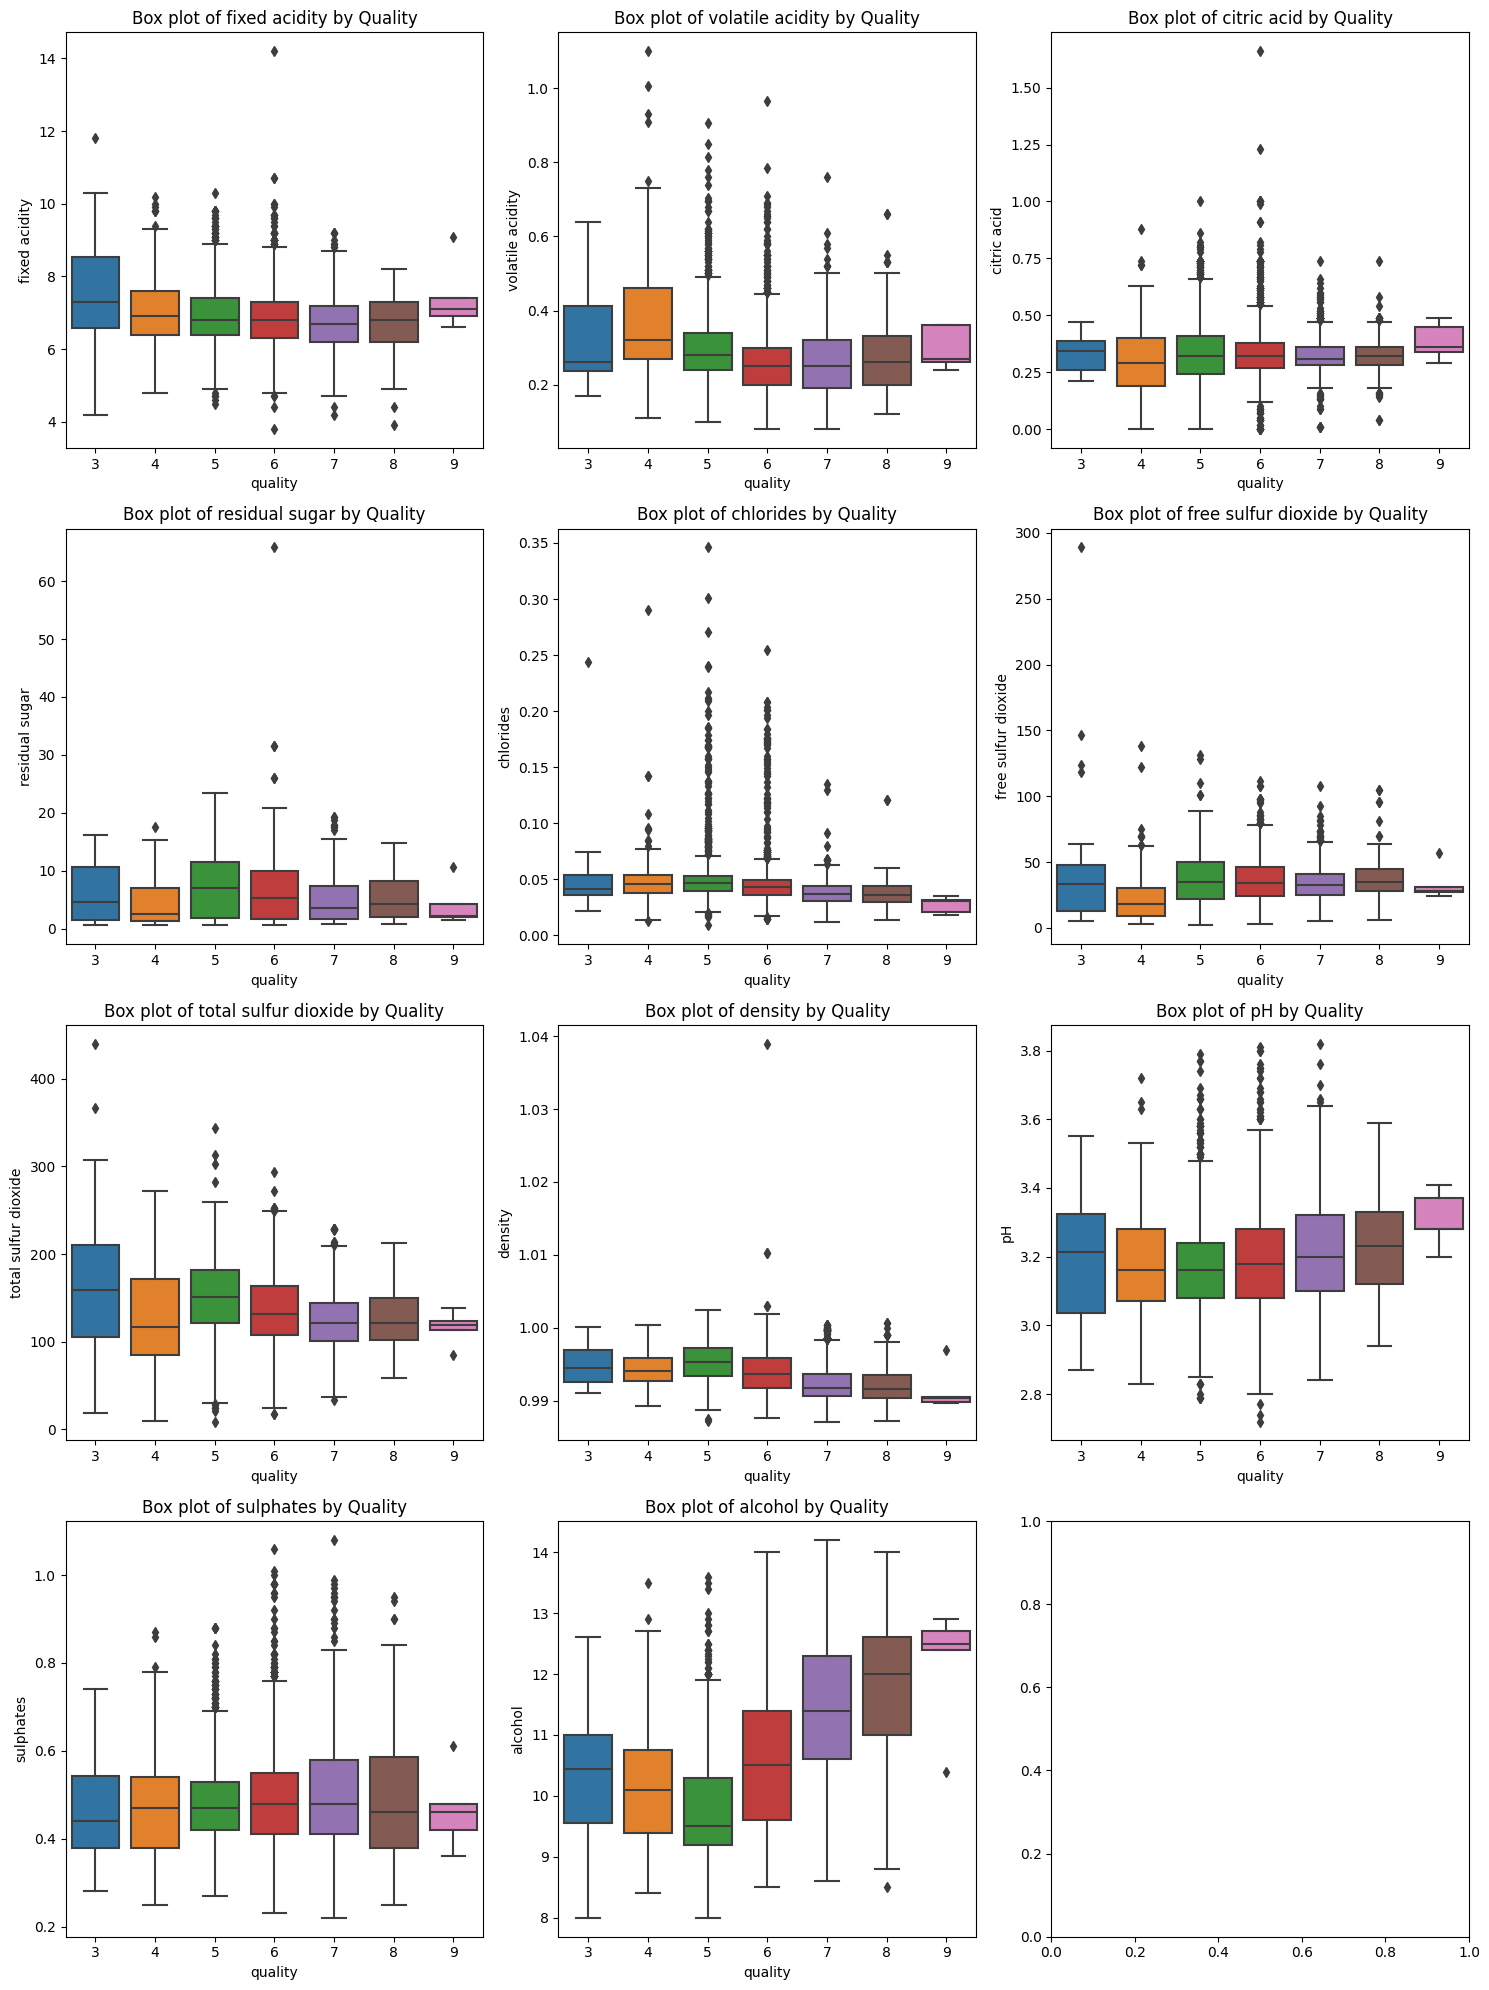

In [274]:
# Filter out the 'quality' column
plot_columns = df.columns[df.columns != 'quality']

# Determine the grid size
n_cols = 3  # You can adjust this based on your preference
n_rows = len(plot_columns) // n_cols + (len(plot_columns) % n_cols > 0)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Loop through the variables and create box plots
for i, col in enumerate(plot_columns):
    row = i // n_cols
    col_index = i % n_cols
    sns.boxplot(x='quality', y=col, data=df, ax=axs[row, col_index])
    axs[row, col_index].set_title(f'Box plot of {col} by Quality')

# Adjust layout for better spacing and visibility
plt.tight_layout()
plt.show()

## **Density Plots by Quality**

*Generate Kernel Density Estimation (KDE) plots for each variable in the dataset, colored by wine quality, to observe the density distribution.*


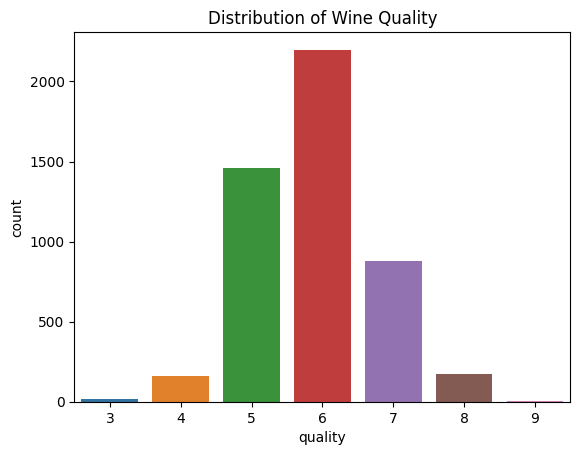

In [275]:
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

## **Joint Plot: Fixed Acidity and pH**

*Create a joint plot with a regression line for 'fixed acidity' and 'pH' to observe their relationship and calculate Pearson's correlation coefficient.*


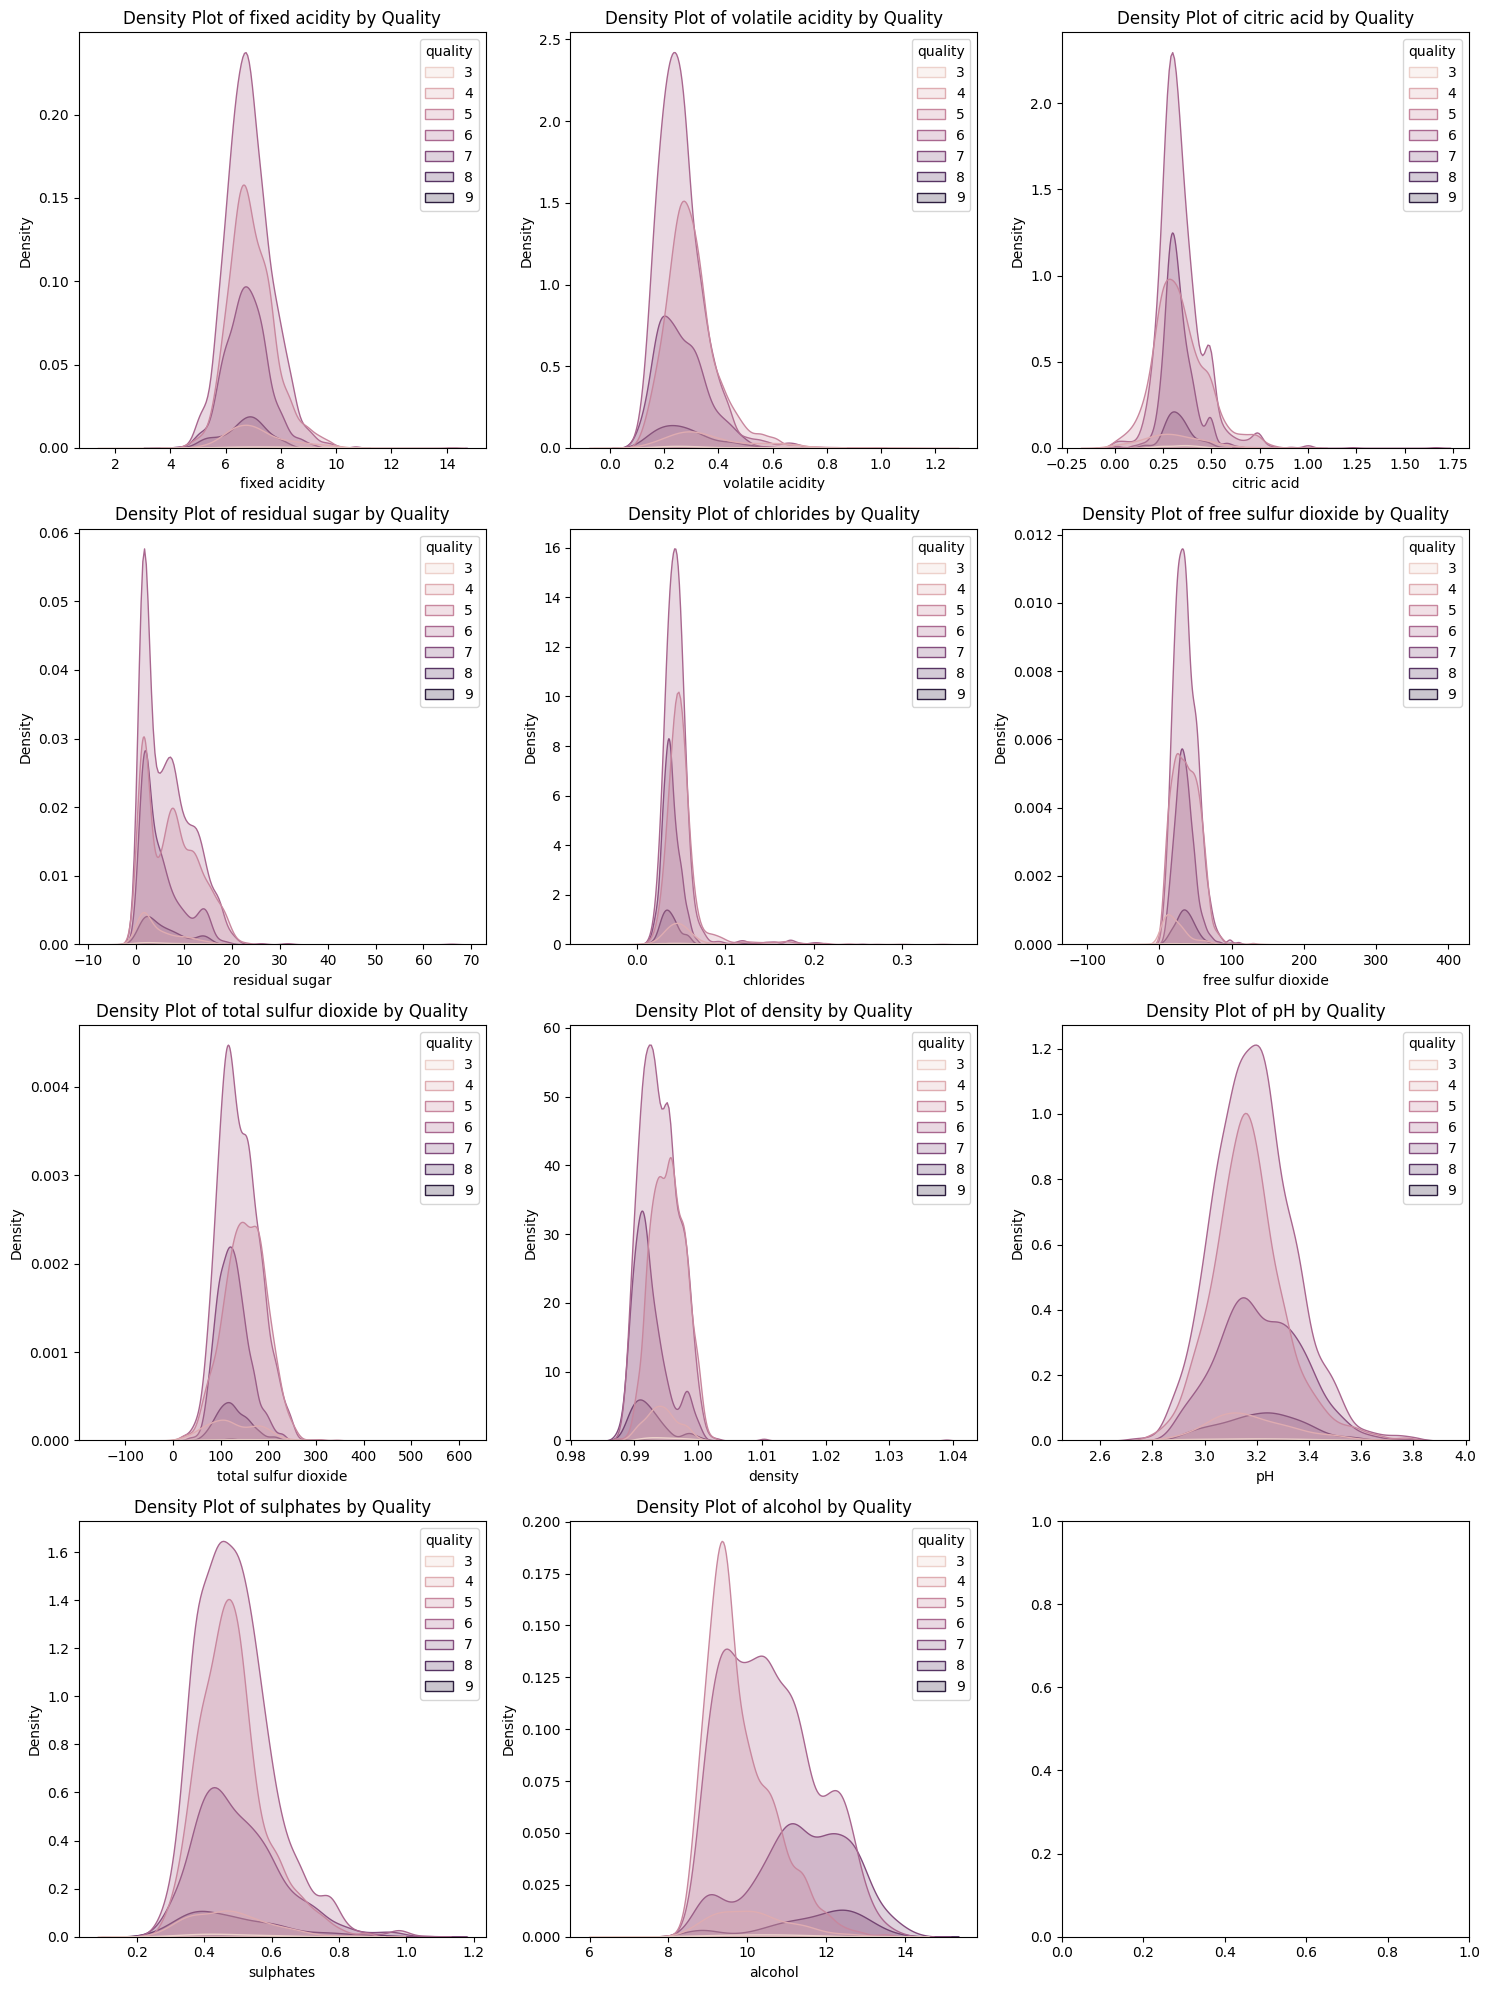

In [276]:
# Filter out the 'quality' column
plot_columns = df.columns[df.columns != 'quality']

# Determine the grid size
n_cols = 3  # You can adjust this based on your preference
n_rows = len(plot_columns) // n_cols + (len(plot_columns) % n_cols > 0)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Loop through the variables and create KDE plots
for i, col in enumerate(plot_columns):
    row = i // n_cols
    col_index = i % n_cols
    sns.kdeplot(data=df, x=col, hue='quality', fill=True, ax=axs[row, col_index])
    axs[row, col_index].set_title(f'Density Plot of {col} by Quality')

# Adjust layout for better spacing and visibility
plt.tight_layout()
plt.show()


## **PCA: Dimensionality Reduction**

*Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and visualize the principal components.*


Text(0.5, 0.9, 'ρ = -0.426, p = 0.000')

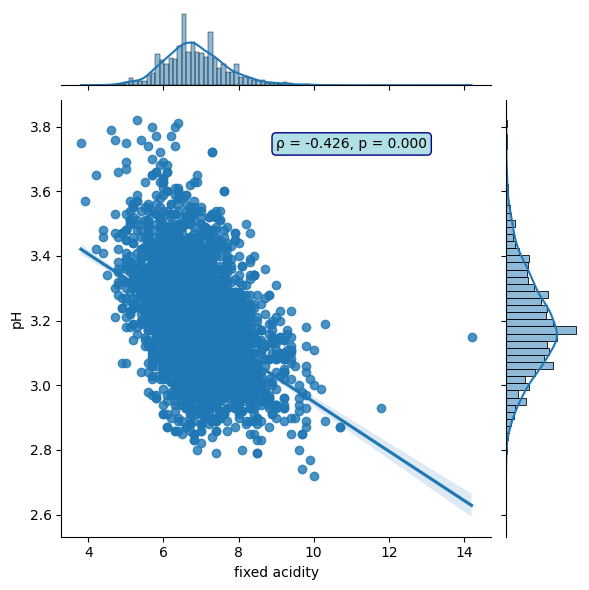

In [277]:
import scipy.stats as stats
import seaborn as sns

# Assuming 'df' is your DataFrame
joint_plt = sns.jointplot(y='pH', x='fixed acidity', data=df, kind='reg')

# Calculate Pearson's correlation
r, p = stats.pearsonr(df['fixed acidity'], df['pH'])

# Annotate the plot with the correlation coefficient and p-value
joint_plt.ax_joint.annotate(f'ρ = {r:.3f}, p = {p:.3f}',
                            xy=(0.5, 0.9), xycoords='axes fraction',
                            ha='left', va='center',
                            bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})


# **Exploratory Data Analysis**

*Explore other potential visualizations and analyses that could provide further insights into the dataset.*

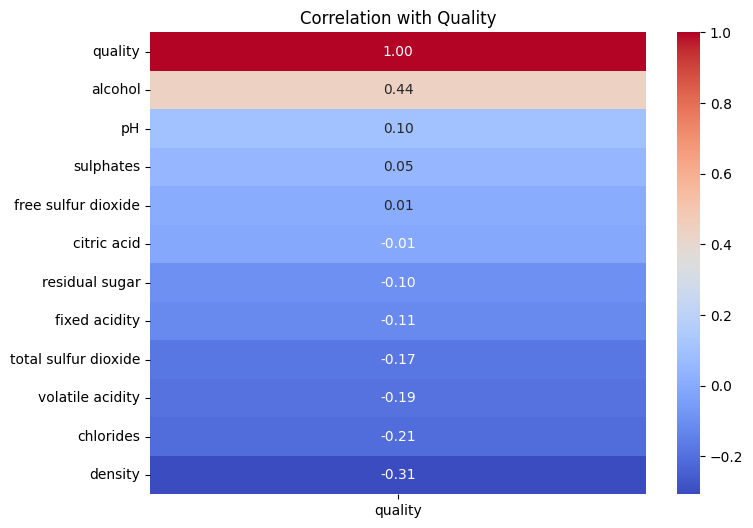

In [278]:
# Assuming df is your DataFrame
# Calculate the correlation with 'quality'
quality_corr = df.corr()['quality'].sort_values(ascending=False)

# Convert to DataFrame for better visualization
quality_corr_df = quality_corr.to_frame()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(quality_corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Quality')
plt.show()


<Axes: >

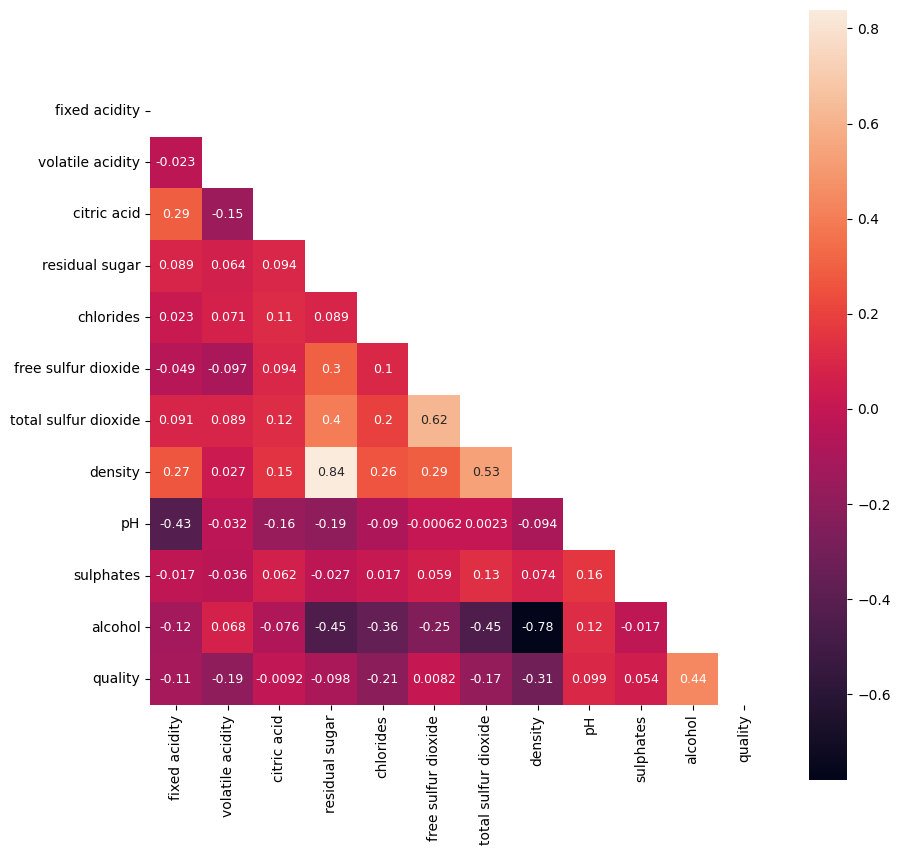

In [279]:
# Assuming 'df' is your DataFrame
correlation = df.corr()

# Create a mask for the upper triangle
mask_triu = np.triu(correlation)

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(10, 10)

# Create the heatmap
sns.heatmap(data=correlation, mask=mask_triu, square=True, annot=True, annot_kws={"size": 9})


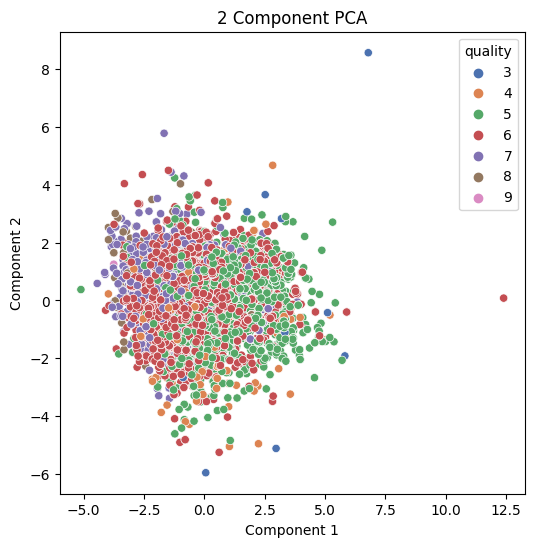

[0.27888907 0.13217419 0.11426434]


In [280]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
data_pca = df

# Standardize the data
data_pca = StandardScaler().fit_transform(data_pca)

# Apply PCA
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)

# Create a DataFrame for the PCA results
pca_dataset = pd.DataFrame(data=pca_results, columns=['component1', 'component2', 'component3'])

# Plot the first two components
plt.figure(figsize=(6, 6))
sns.scatterplot(x='component1', y='component2', hue=df['quality'], palette="deep", data=pca_dataset)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')

# Show the plot
plt.show()

# Display explained variance ratio
print(pca.explained_variance_ratio_)


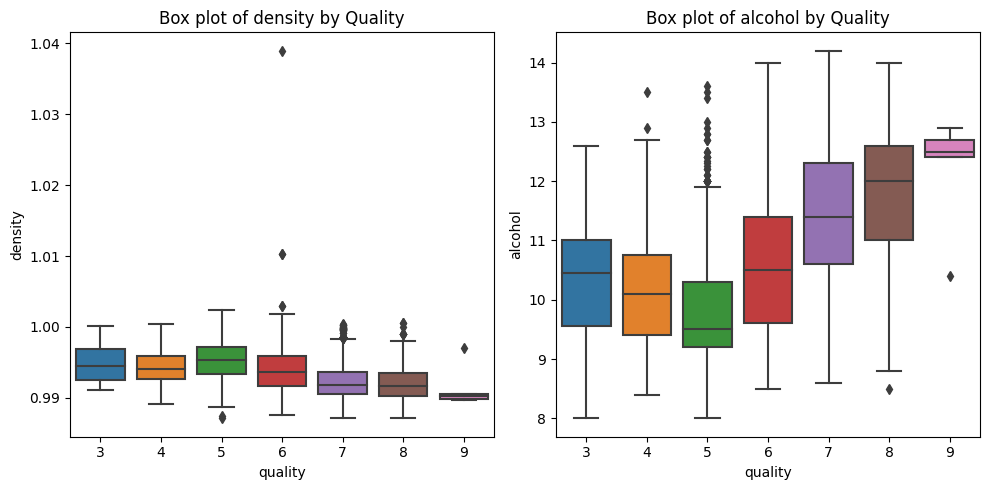

In [281]:
# Select only 'density' and 'alcohol' for plotting
plot_columns = ['density', 'alcohol']

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Loop through the selected variables and create box plots
for i, col in enumerate(plot_columns):
    sns.boxplot(x='quality', y=col, data=df, ax=axs[i])
    axs[i].set_title(f'Box plot of {col} by Quality')

plt.tight_layout()
plt.show()


# Wine Quality Prediction using Artificial Neural Network (ANN)


Test set accuracy: 0.59

Classification Report:
               precision  recall  f1-score  support
3                  1.00    0.00      0.00     9.00
4                  1.00    0.05      0.10    57.00
5                  0.67    0.57      0.62   375.00
6                  0.55    0.81      0.65   522.00
7                  0.62    0.35      0.45   223.00
8                  0.75    0.08      0.14    39.00
accuracy           0.59    0.59      0.59     0.59
macro avg          0.76    0.31      0.33  1225.00
weighted avg       0.63    0.59      0.56  1225.00


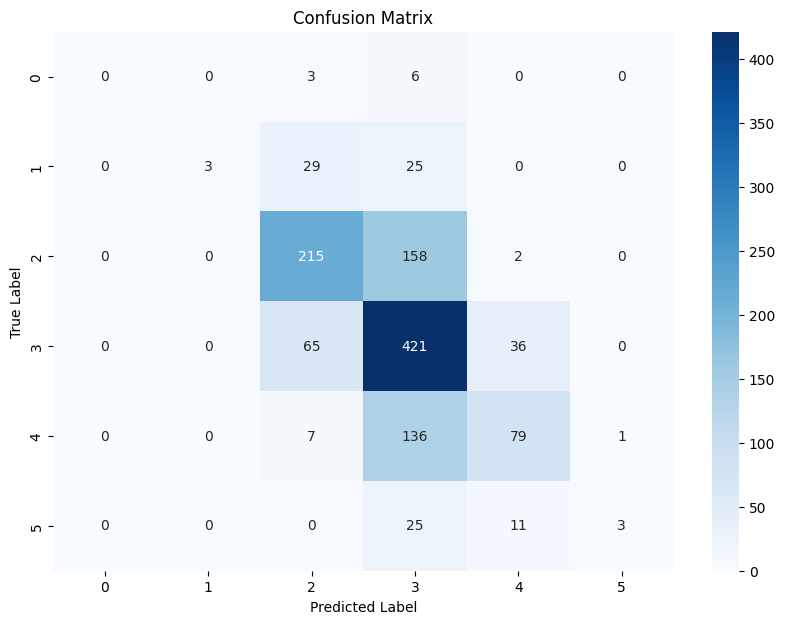

In [282]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your pre-loaded DataFrame

# Selecting features and target variable
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']]
y = df['quality']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Scaling the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Loading and configuring the SVM model
svm = SVC(kernel='rbf', random_state=0, gamma=0.7, C=1.0)

# Fitting the model to the training data
svm.fit(X_train_std, y_train)

# Predicting on the entire test set
y_pred = svm.predict(X_test_std)

# Evaluating the model's accuracy
print("Test set accuracy: {:.2f}".format(svm.score(X_test_std, y_test)))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report with zero_division parameter
class_report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)

# Convert classification report to DataFrame for better formatting
class_report_df = pd.DataFrame(class_report).transpose()
print("\nClassification Report:\n", class_report_df.round(2))

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [283]:
# Binarize the target variable based on a threshold (e.g., quality > 6 is high quality)

threshold = 6
df['quality_binary'] = np.where(df['quality'] > threshold, 1, 0)

# Feature Engineering
X['alcohol_squared'] = X['alcohol'] ** 2  # Adding the square of 'alcohol'
X['density_squared'] = X['density'] ** 2  # Adding the square of 'density'
X['alcohol_density_interaction'] = X['alcohol'] * X['density']  # Interaction term

X = df.drop('quality', axis=1)
y = df['quality']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-283-b37be71e7186>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['alcohol_squared'] = X['alcohol'] ** 2  # Adding the square of 'alcohol'
<ipython-input-283-b37be71e7186>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['density_squared'] = X['density'] ** 2  # Adding the square of 'density'
<ipython-input-283-b37be71e7186>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [284]:
X.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
4490,5.8,0.3,0.33,3.5,0.033,25.0,116.0,0.99057,3.2,0.44,11.7,0


In [285]:
pp.range(df)

,Min Value,Max Value
fixed acidity,3.80000,14.20000
volatile acidity,0.08000,1.10000
citric acid,0.00000,1.66000
residual sugar,0.60000,65.80000
chlorides,0.00900,0.34600
free sulfur dioxide,2.00000,289.00000
total sulfur dioxide,9.00000,440.00000
density,0.98711,1.03898
pH,2.72000,3.82000
sulphates,0.22000,1.08000


In [286]:
# !pip install tpot


In [287]:
# from tpot import TPOTClassifier

In [288]:
# tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
# tpot.fit(X_train, y_train)

# Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [289]:
# Predicting on the test set
# y_pred = tpot.predict(X_test)

# Calculating accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test set accuracy: {accuracy:.2f}")
# Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=2, n_estimators=100)# Import necessary libraries

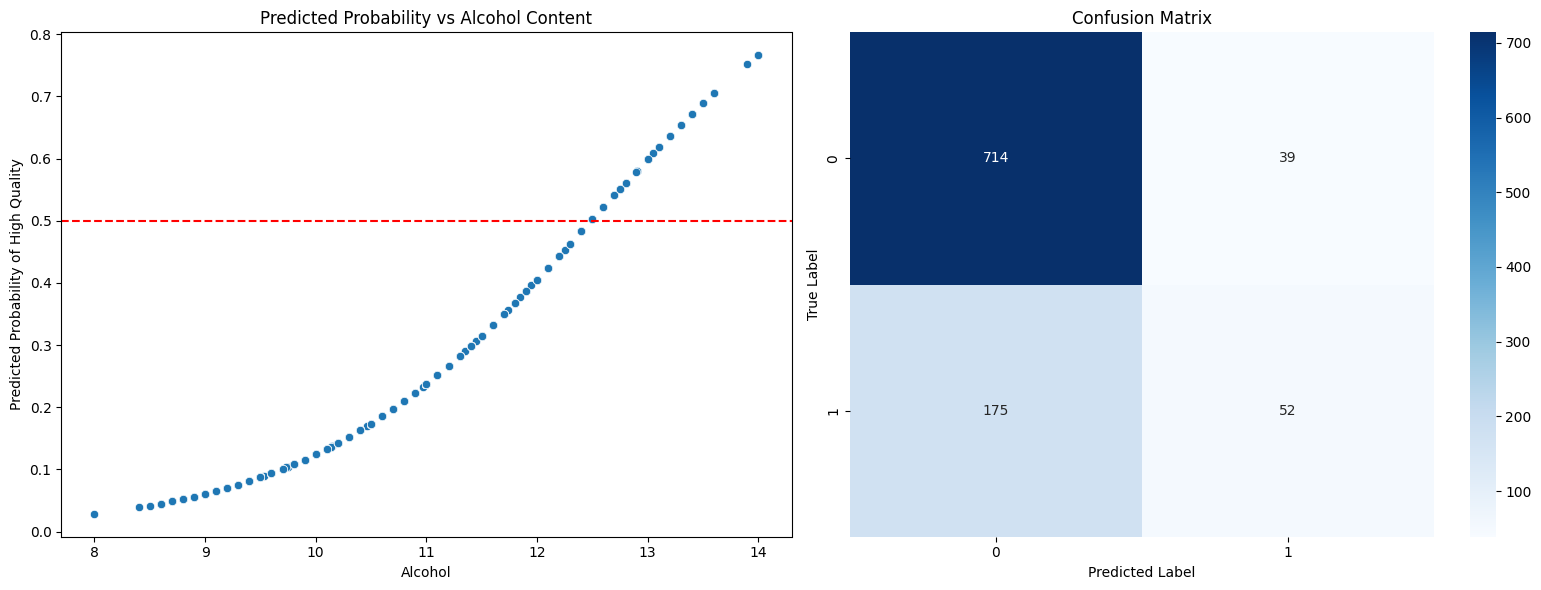

Confusion Matrix:
[[714  39]
 [175  52]]


In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Selecting features for polynomial logistic regression
X = df[['alcohol', 'density']].copy()  # Using 'alcohol' and 'density' features


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['quality_binary'], test_size=0.2, random_state=42)

# Creating and training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting predicted probabilities
sns.scatterplot(x=X_test['alcohol'], y=log_reg.predict_proba(X_test)[:, 1], ax=axes[0])
axes[0].axhline(y=0.5, color='red', linestyle='--')  # Default threshold
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Predicted Probability of High Quality')
axes[0].set_title('Predicted Probability vs Alcohol Content')

# Function to plot confusion matrix
def plot_confusion_matrix(cm, ax, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    ax.set_title(title)

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, axes[1])

plt.tight_layout()
plt.show()

# Print text representation of confusion matrix
print("Confusion Matrix:")
print(cm)

In [291]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

from scipy import stats
import numpy as np

# Assuming 'df' is your DataFrame
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target

# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(X))
threshold = 3  # typically a Z-score above 3 is considered an outlier
X = X[(z_scores < threshold).all(axis=1)]
y = y[(z_scores < threshold).all(axis=1)]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and experiment with hyperparameters (HP)
models = {

    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42),

    "Random Forest": RandomForestClassifier(random_state=42, min_samples_split=10, max_depth=5),

    "Gradient Boosting": GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

    }

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_overall_pred = model.predict(X)

    # Calculate performance metrics
    train_acc = round(accuracy_score(y_train, y_train_pred), 4)
    test_acc = round(accuracy_score(y_test, y_test_pred), 4)
    test_recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
    test_precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
    test_f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)
    overall_acc = round(accuracy_score(y_overall_pred, y), 4)

    return test_acc, train_acc, test_recall, test_precision, test_f1, overall_acc

# Evaluate each model and store results
results = []
for name, model in models.items():
    test_acc, train_acc, test_recall, test_precision, test_f1, overall_acc = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append([name, test_acc, train_acc, test_recall, test_precision, test_f1, overall_acc])


# Convert results to a DataFrame and display
results_df = pd.DataFrame(results, columns=['Model', 'Test Accuracy', 'Train Accuracy', 'Test Recall', 'Test Precision', 'Test F1', 'Overall Accuracy'])
results_df.head(9)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Test Accuracy,Train Accuracy,Test Recall,Test Precision,Test F1,Overall Accuracy
0,Decision Tree,0.7014,0.7359,0.3652,0.4015,0.3673,0.7290
1,Random Forest,0.7270,0.7462,0.3474,0.4567,0.3342,0.7423
2,Gradient Boosting,0.7392,0.8317,0.4009,0.4668,0.4152,0.8132


In [292]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'quality' is the target variable
X = df.drop('quality', axis=1)  # Features

y = df['quality']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(k_neighbors=min(2, min(y_train.value_counts()) - 1))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define models and experiment with hyperparameters (HP)
models = {

    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42),

    "Random Forest": RandomForestClassifier(random_state=42, min_samples_split=10, max_depth=5),

    "Gradient Boosting": GradientBoostingClassifier(random_state=42, min_samples_split=10, max_depth=5),

     "Gradient Boosting 2": GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

    }

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_overall_pred = model.predict(X)

    # Calculate performance metrics
    train_acc = round(accuracy_score(y_train, y_train_pred), 4)
    test_acc = round(accuracy_score(y_test, y_test_pred), 4)
    test_recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
    test_precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
    test_f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)
    overall_acc = round(accuracy_score(y_overall_pred, y), 4)

    return test_acc, train_acc, test_recall, test_precision, test_f1, overall_acc

# Evaluate each model and store results
results = []
for name, model in models.items():
    test_acc, train_acc, test_recall, test_precision, test_f1, overall_acc = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append([name, test_acc, train_acc, test_recall, test_precision, test_f1, overall_acc])

# Convert results to a DataFrame and display
smote_results_df = pd.DataFrame(results, columns=['Model', 'Test Accuracy', 'Train Accuracy', 'Test Recall', 'Test Precision', 'Test F1', 'Overall Accuracy'])
smote_results_df.head(9)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Test Accuracy,Train Accuracy,Test Recall,Test Precision,Test F1,Overall Accuracy
0,Decision Tree,0.6827,0.7231,0.3939,0.4215,0.3878,0.7150
1,Random Forest,0.6980,0.7325,0.3929,0.5209,0.3846,0.7256
2,Gradient Boosting,0.7643,0.9354,0.5431,0.6318,0.5724,0.9012
3,Gradient Boosting 2,0.7235,0.8208,0.5039,0.5895,0.5196,0.8013


In [293]:
from sklearn.metrics import f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate performance metrics
    train_acc = round(accuracy_score(y_train, y_train_pred), 4)
    test_acc = round(accuracy_score(y_test, y_test_pred), 4)
    test_recall = round(recall_score(y_test, y_test_pred, average='macro', zero_division=0), 4)
    test_precision = round(precision_score(y_test, y_test_pred, average='macro', zero_division=0), 4)
    test_f1 = round(f1_score(y_test, y_test_pred, average='macro', zero_division=0), 4)
    overall_acc = round(accuracy_score(y, model.predict(X)), 4)

    return test_acc, train_acc, test_recall, test_precision, test_f1, overall_acc

# Evaluate each model and store results
results = []
for name, model in models.items():
    test_acc, train_acc, test_recall, test_precision, test_f1, overall_acc = evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test)
    results.append([name, test_acc, train_acc, test_recall, test_precision, test_f1, overall_acc])

# Convert results to a DataFrame and display
smote_model_results_df = pd.DataFrame(results, columns=['Model', 'Test Accuracy', 'Train Accuracy', 'Test Recall', 'Test Precision', 'Test F1', 'Overall Accuracy'])
smote_model_results_df.head()


,Model,Test Accuracy,Train Accuracy,Test Recall,Test Precision,Test F1,Overall Accuracy
0,Decision Tree,0.5673,0.6698,0.3840,0.3697,0.3475,0.5823
1,Random Forest,0.5837,0.7678,0.4591,0.3705,0.3705,0.6231
2,Gradient Boosting,0.7184,0.9667,0.5560,0.5337,0.5395,0.8738
3,Gradient Boosting 2,0.6663,0.8746,0.5605,0.4809,0.4984,0.7458


In [294]:
results_df.head(9)

,Model,Test Accuracy,Train Accuracy,Test Recall,Test Precision,Test F1,Overall Accuracy
0,Decision Tree,0.7014,0.7359,0.3652,0.4015,0.3673,0.7290
1,Random Forest,0.7270,0.7462,0.3474,0.4567,0.3342,0.7423
2,Gradient Boosting,0.7392,0.8317,0.4009,0.4668,0.4152,0.8132


In [295]:
smote_results_df.head(9)

,Model,Test Accuracy,Train Accuracy,Test Recall,Test Precision,Test F1,Overall Accuracy
0,Decision Tree,0.6827,0.7231,0.3939,0.4215,0.3878,0.7150
1,Random Forest,0.6980,0.7325,0.3929,0.5209,0.3846,0.7256
2,Gradient Boosting,0.7643,0.9354,0.5431,0.6318,0.5724,0.9012
3,Gradient Boosting 2,0.7235,0.8208,0.5039,0.5895,0.5196,0.8013


138/138 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support
           0       0.00      0.00      0.00         2
           1       0.60      0.12      0.20        25
           2       0.54      0.56      0.55       132
           3       0.49      0.66      0.56       203
           4       0.48      0.33      0.39       108
           5       0.50      0.10      0.17        20
    accuracy                           0.51       490
   macro avg       0.44      0.29      0.31       490
weighted avg       0.51      0.51      0.49       490

Classification Report:
              precision    recall  f1-score   support
           0       1.00      0.17      0.29        18
           1       0.61      0.14      0.22       138
           2       0.64      0.61      0.63      1325
           3       0.60      0.73      0.66      1995
           4       0.55      0.46      0.50       772
           5       0.56      0.06 

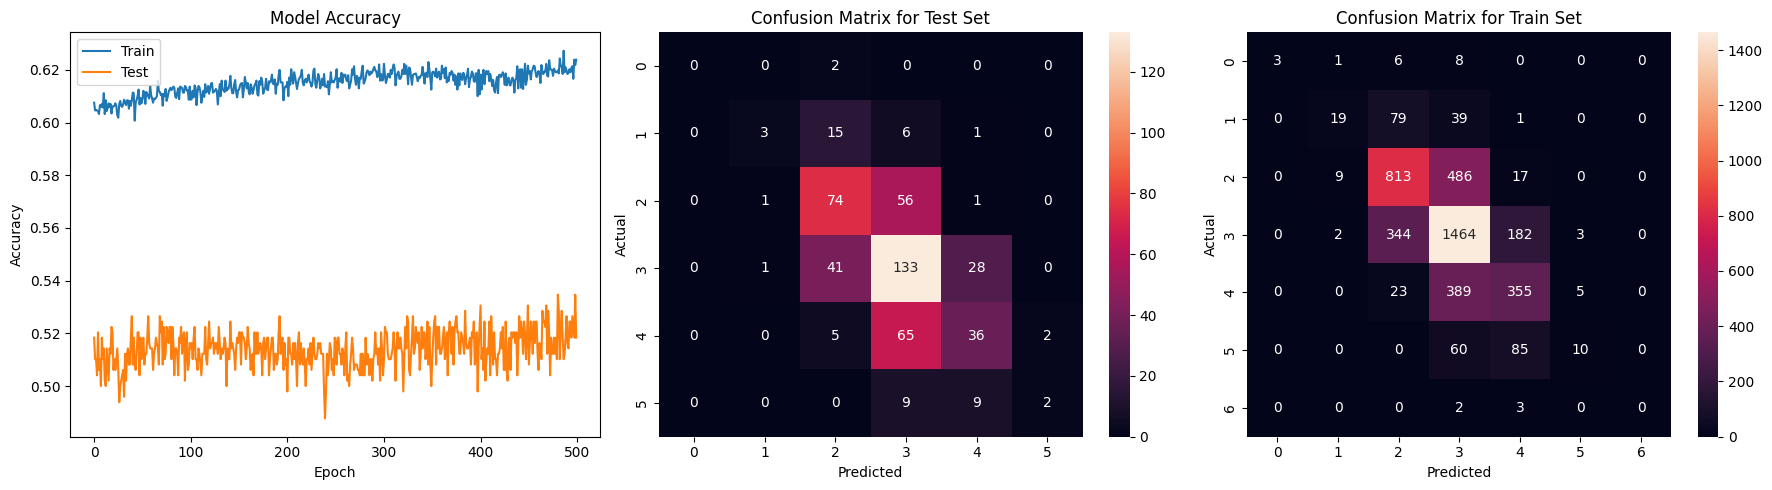

In [296]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Feature Engineering
df['alcohol_squared'] = df['alcohol'] ** 2
df['density_squared'] = df['density'] ** 2
df['alcohol_density_interaction'] = df['alcohol'] * df['density']

# Define input (X) and output (y)
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'alcohol_squared', 'density_squared', 'alcohol_density_interaction']]
y = df['quality']


# Encode output data
lbl_clf = LabelEncoder()
y_encoded = lbl_clf.fit_transform(y)
y_final = tf.keras.utils.to_categorical(y_encoded)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size=0.1, random_state=0)

# Scaling the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Determine the number of unique classes
num_classes = len(np.unique(y_encoded))

# Building the ANN model
model = Sequential()
model.add(Dense(16, input_dim=14, activation='relu'))  # Update input_dim to 14
model.add(Dense(12, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_std, y_train, epochs=250, batch_size=64, verbose=0)

# Predictions for test set
y_pred_test = model.predict(X_test_std)
pred_test = [np.argmax(i) for i in y_pred_test]
test_labels = [np.argmax(i) for i in y_test]

# Predictions for train set
y_pred_train = model.predict(X_train_std)
pred_train = [np.argmax(i) for i in y_pred_train]
train_labels = [np.argmax(i) for i in y_train]

# Function to format classification report
def format_classification_report(report):
    report = "Classification Report:\n" + report
    return report.replace('\n\n', '\n')

# Classification report for test set
report_test = classification_report(test_labels, pred_test, zero_division=0)
print(format_classification_report(report_test))

# Classification report for train set
report_train = classification_report(train_labels, pred_train, zero_division=0)
print(format_classification_report(report_train))


# Overall accuracy for test set
test_accuracy = accuracy_score(test_labels, pred_test)
print("Test Set Accuracy:", test_accuracy)

# Overall accuracy for train set
train_accuracy = accuracy_score(train_labels, pred_train)
print("Train Set Accuracy:", train_accuracy)


# Train the model with validation data
history = model.fit(X_train_std, y_train, validation_data=(X_test_std, y_test), epochs=500, batch_size=64, verbose=0)

# Start of the plotting section
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot for model accuracy
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Compute and plot confusion matrix for test set
cm_test = confusion_matrix(test_labels, pred_test)
sns.heatmap(cm_test, annot=True, fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix for Test Set')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

# Compute and plot confusion matrix for train set
cm_train = confusion_matrix(train_labels, pred_train)
sns.heatmap(cm_train, annot=True, fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix for Train Set')
axes[2].set_ylabel('Actual')
axes[2].set_xlabel('Predicted')

# Show the plots
plt.tight_layout()
plt.show()